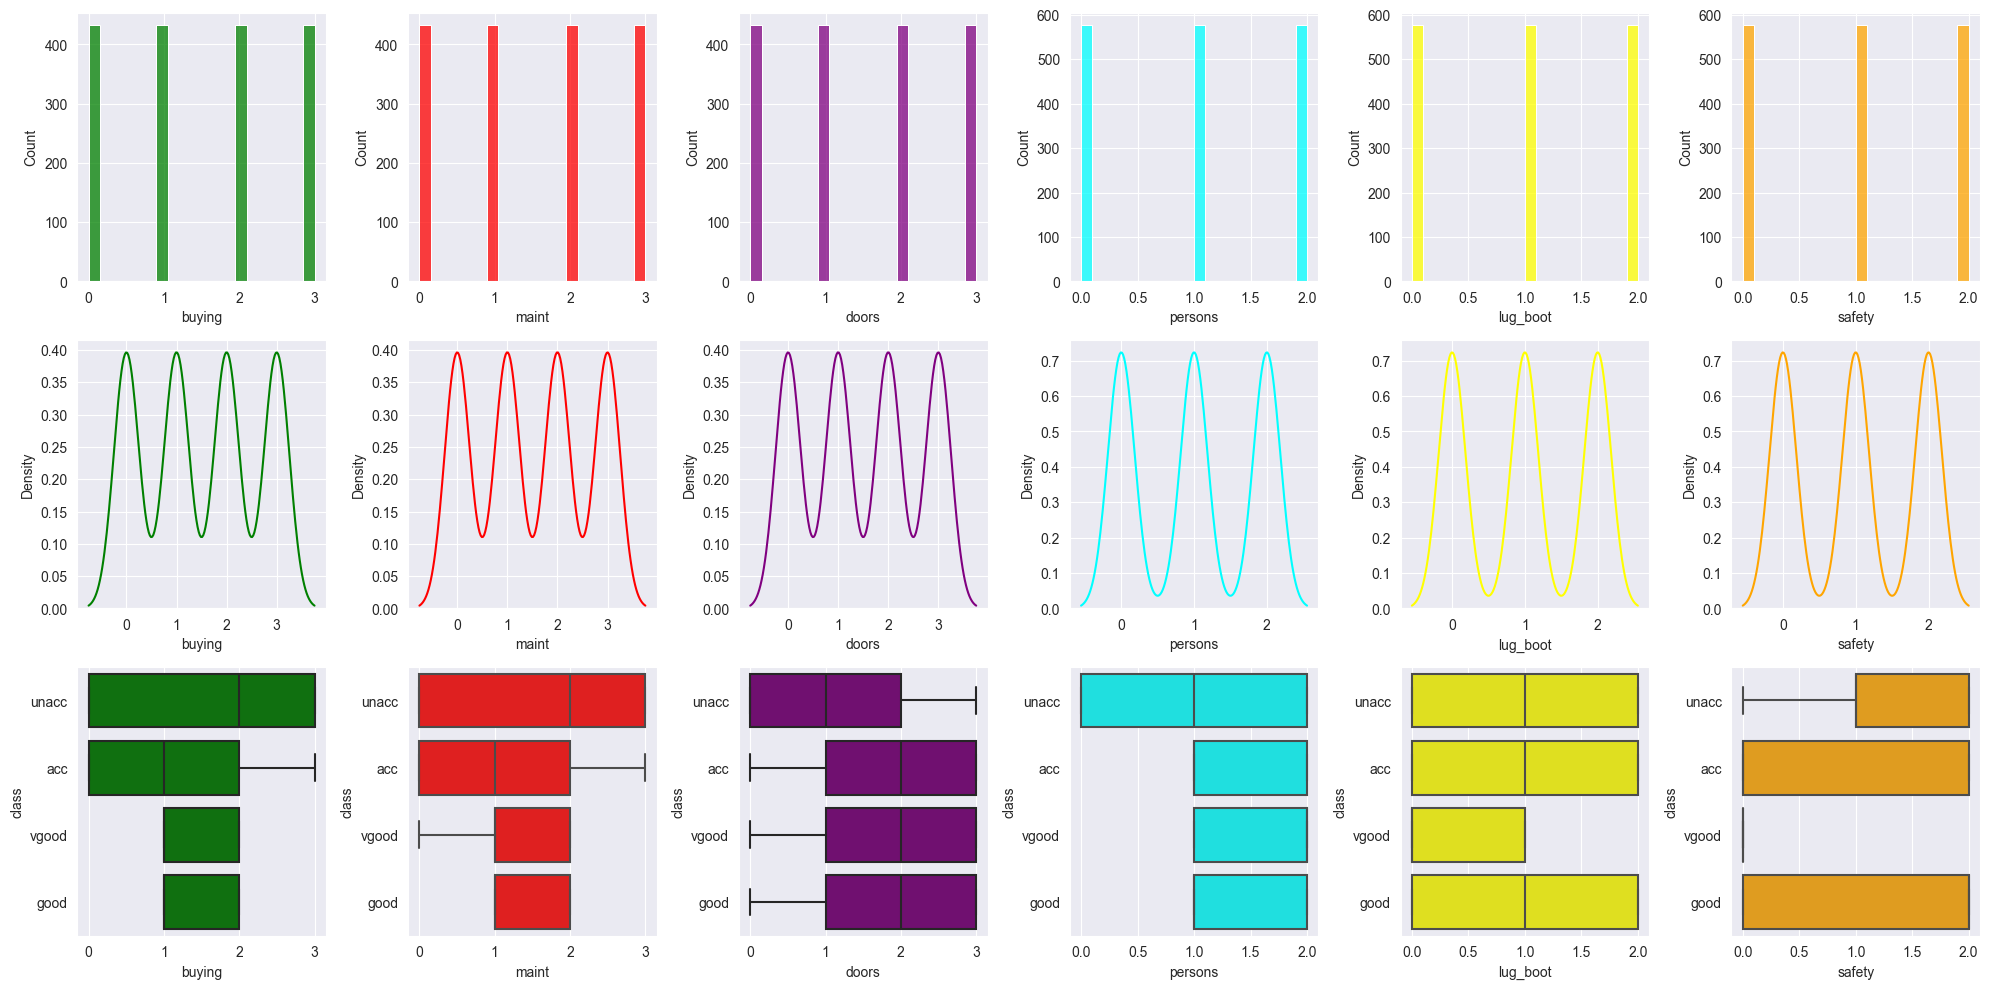

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

data = pd.read_csv("car.data")

# print(data.columns)
# data.columns: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# categorical_columns: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Define the categorical columns
categorical_columns = list(data.columns)[:6]

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Extract X and y
X = data[categorical_columns].values
y = data['class']

# Create subplots
fig, axes = plt.subplots(figsize=(20, 10), nrows=3,
                         ncols=len(categorical_columns), squeeze=False)
# The ax parameter in the sns.histplot() function expects a single axis object.
# Flatten the axes array to make it 1-dimensional
axes = axes.flatten()

colors = ["green", "red", "purple", "cyan", "yellow", "orange"]

# Plot histplot, kdeplot, and boxplot
for col_no, col in enumerate(categorical_columns):
    sns.histplot(x=col.strip(), data=data, ax=axes[col_no], bins=20, color=colors[col_no])
    sns.kdeplot(x=col.strip(), data=data, ax=axes[col_no + len(categorical_columns)], color=colors[col_no])
    sns.boxplot(x=col.strip(), y=y, data=data, ax=axes[col_no + 2 * len(categorical_columns)], color=colors[col_no])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


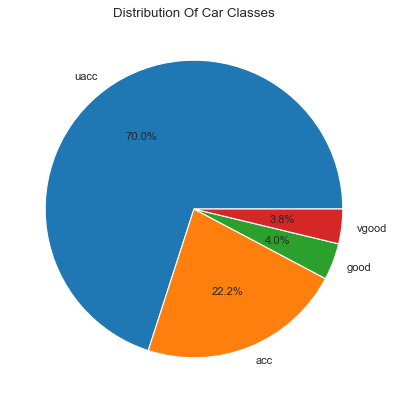

In [30]:
labels = ['uacc', 'acc', 'good', 'vgood']

plt.figure(figsize=(6, 8), dpi=80)
plt.pie(data["class"].value_counts(), autopct='%.1f%%', labels=labels)
plt.title("Distribution Of Car Classes")
plt.show()


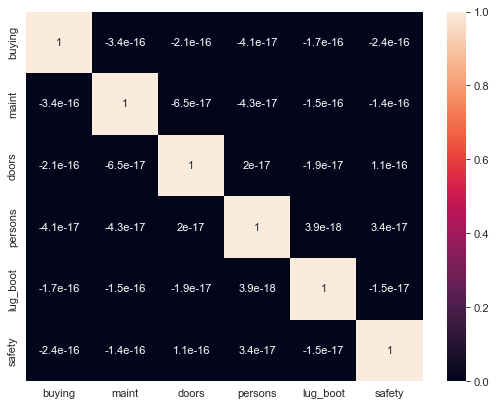

In [31]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(data.corr(), annot=True)
plt.show()

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.838150289017341
